In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!curl https://policeviolencereport.org/data/police-violence-report-2017.xlsx > policeviolence.xlsx

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  446k  100  446k    0     0  1531k      0 --:--:-- --:--:-- --:--:-- 1537k


In [3]:
# ove the downloaded data to PUI data
print("PUIDATA", os.getenv("PUIDATA"))

PUIDATA /nfshome/ys3226/PUIdata


In [4]:
#create the env variable if missing
os.environ["PUIDATA"] = "%s/PUIDATA"%os.getenv("HOME")

print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/ys3226/PUIDATA


In [5]:
# move the data
!mv policeviolence.xlsx $PUIDATA

In [6]:
df = pd.read_excel("%s/policeviolence.xlsx"%os.getenv("PUIDATA"))

In [7]:
df.head()

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,...,WaPo ID (If included in WaPo database),Alleged Crime or Reason for Initial Encounter,Suspected Offense Category,Name(s) of Officers Involved,Race of officer(s),Number of years on the force prior to the date of incident,Officer's Previous Shootings,Time of day of incident,Is there video of the incident?,Unique ID
0,James E. Lewis,44,Male,Black,http://www.fatalencounters.org/wp-content/uplo...,2017-01-01,1101 E Scott St,Springfield,MO,65802.0,...,2180.0,"aggravated assault, wellness check/erratic beh...",Violent,"Daniel Carlson, Joshua Brown, Brandon Gonzales",NaN,NaN,NaN,03:20:00,dash cam video,214.0
1,Trevon Johnson,17,Male,Black,NaN,2017-01-01,Standish Lane and Ardmore Avenue,Villa Park,IL,60181.0,...,2178.0,domestic disturbance,General Domestic Disturbance,Deputy Scott Kuschell,white,14,NaN,23:45:00,No,212.0
2,Mark Guirguis,21,Male,Black,http://www.fatalencounters.org/wp-content/uplo...,2017-01-01,700 South Jupiter Road,Allen,TX,75002.0,...,2187.0,disorderly conduct,Public Order,NaN,NaN,NaN,NaN,00:30:00,No,213.0
3,Juan Carlos Cuadra,23,Male,Hispanic,NaN,2017-01-01,14200 Burnham Drive,Houston,TX,77053.0,...,2185.0,"disorderly conduct, assault/battery",Assault/Battery,NaN,NaN,NaN,NaN,07:30:00,No,359.0
4,Chad Erik Roberts,35,Male,White,NaN,2017-01-01,"I-75, Wade Green Road",Kennesaw,GA,30144.0,...,2184.0,suspicious activity,Profiling,"Matt Davis, William Vincent","white, white","3.5, 2",NaN,22:00:00,No,868.0


In [9]:
df_pivot = df[['City', "Victim's race"]].groupby(["City", "Victim's race"])["Victim's race"].count().unstack()

In [10]:
#check out a sample city
df_pivot[df_pivot.index == 'Los Angeles']

Victim's race,Asian,Black,Hispanic,Native American,Pacific Islander,Unknown Race,Unknown race,White
City,,,,,,,,
Los Angeles,NaN,4.0,6.0,NaN,NaN,NaN,NaN,4.0


In [11]:
df_pivot = df_pivot.fillna(0)

In [12]:
df_pivot['Total'] = df_pivot.sum(axis=1)
df_pivot.head()

Victim's race,Asian,Black,Hispanic,Native American,Pacific Islander,Unknown Race,Unknown race,White,Total
City,,,,,,,,,
Abbeville,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Abilene,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
Abingdon,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
Affton,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
Aiea,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [13]:
df_pivot['Black Ratio'] = df_pivot['Black'] / df_pivot['Total']
df_pivot[df_pivot.index == 'Los Angeles']

Victim's race,Asian,Black,Hispanic,Native American,Pacific Islander,Unknown Race,Unknown race,White,Total,Black Ratio
City,,,,,,,,,,
Los Angeles,0.0,4.0,6.0,0.0,0.0,0.0,0.0,4.0,14.0,0.285714


In [15]:
# Metro areas with Largest African-American Population(2014 Census Estimates)
# http://blackdemographics.com/population/black-city-population/
# SOURCE: 2010-2014 American Community Survey 5-Year Estimates,  Black Alone= not in combination with other race.
# CSA: Combined Statistical Area (CSA) is composed of adjacent metropolitan areas

d = {'City': ['New York', 'Atlanta', 'Chicago', 'Washington', 'Philadelphia', 'Miami', 'Los Angeles',
              'Houston', 'Dallas', 'Detroit', 'Baltimore', 'Memphis', 'San Fransisco', 'Norfolk', 'St. Louis',
              'Charlotte', 'Raleigh', 'New Orleans', 'Cleveland', 'Richmond'], 
     'Black Percentage': [17, 33, 17, 25, 21, 21, 7, 17, 15, 23, 29, 46, 6, 31, 18, 22, 23, 35, 20, 30]}
black_perc = pd.DataFrame(data=d)

In [16]:
black_perc.head()

,Black Percentage,City
0,17,New York
1,33,Atlanta
2,17,Chicago
3,25,Washington
4,21,Philadelphia


In [64]:
black = black_perc.merge(df_pivot, left_on='City', right_index=True, how='inner')
black['Black Ratio'] = (black['Black Ratio']*100).astype(int)

In [65]:
black = black[['City', 'Black Ratio', 'Black Percentage']]

In [66]:
black = black.sort_values(by='Black Percentage', ascending=False)

In [67]:
black = black.reset_index(drop=True)
#black = black.set_index('City')
black = black.rename(index=str, columns={"Black Ratio": "% of shooting", "Black Percentage": "% of population"})
black.head()

,City,% of shooting,% of population
0,New Orleans,100,35
1,Atlanta,50,33
2,Norfolk,50,31
3,Richmond,12,30
4,Baltimore,80,29


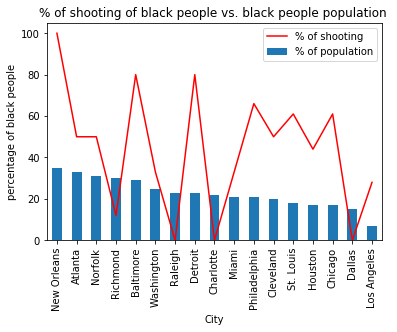

In [69]:
ax = black[['City', '% of shooting']].plot(x='City', color='red', linestyle='-')
black[['City', '% of population']].plot(x='City', kind='bar', ax=ax)
plt.ylabel('percentage of black people')
plt.legend()
plt.title('% of shooting of black people vs. black people population ')
plt.show()

Figure 1: Comparing the % of shooting of black people with the black people population in Metro areas with Largest African-American Population

#### Comment: There is no regular pattern of % of black people killed in police shooting with the % of black population in Metro areas with Largest African-American Population.